In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
labels = ['Duration', 'Proto', 'ExpID','SrcIPAddr', 'DStIPAddr',
         'SrcPt','DstPt','Next-hopIP', 'BGPnext-hopIP', 'RouterIP',
         'SrcAS', 'DstAS','Input', 'Output', 'Packets', 'Bytes']
flow_df = pd.read_csv('flow_stripped_extract.csv', header = 0, names = labels)



In [45]:
flow_df.head()

,Duration,Proto,ExpID,SrcIPAddr,DStIPAddr,SrcPt,DstPt,Next-hopIP,BGPnext-hopIP,RouterIP,SrcAS,DstAS,Input,Output,Packets,Bytes
0,0.000,17,15,217.246.157.109,104.168.46.28,24442,123.0,62.40.98.128,62.40.97.4,62.40.97.11,1299,2607,1079,693,300,10800
1,0.000,6,15,204.39.243.243,51.245.202.229,39574,80.0,62.40.98.80,62.40.96.17,62.40.97.11,16276,1930,1143,605,300,12000
2,3.469,17,15,53.215.254.243,104.232.195.133,47550,15331.0,62.40.98.128,62.40.97.4,62.40.97.11,1299,2607,1079,693,600,28800
3,0.000,17,15,185.186.207.68,115.144.161.13,443,51539.0,62.40.98.80,62.40.97.5,62.40.97.11,15169,378,823,605,300,413400
4,0.000,17,15,2400:bf..34:165d,df7e:c6..d7:6510,21616,51413.0,::ffff:...98.128,::,62.40.97.11,1299,5408,1079,693,300,43800


In [46]:
flow_df.describe()

,Duration,Proto,ExpID,SrcPt,DstPt,SrcAS,DstAS,Input,Output,Packets,Bytes
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.00000,9.999000e+03,9.999000e+03
mean,1.573061e+03,7.389439,12.395340,27388.916792,22989.139309,15131.375438,6661.785779,5.910670e+03,739.20482,4.669847e+03,5.782349e+06
std,4.940136e+04,4.974445,5.737788,23563.873963,22533.348446,37215.921515,11179.691289,2.905602e+05,183.81520,3.240161e+04,5.142393e+07
min,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.190000e+02,0.00000,3.000000e+02,9.000000e+03
25%,0.000000e+00,6.000000,9.000000,443.000000,443.000000,1299.000000,766.000000,6.610000e+02,648.00000,3.000000e+02,1.200000e+04
50%,0.000000e+00,6.000000,13.000000,31600.000000,14580.000000,2906.000000,2108.000000,8.310000e+02,693.00000,3.000000e+02,3.120000e+04
75%,1.372800e+01,6.000000,15.000000,50318.000000,44538.500000,12876.000000,8517.000000,1.094000e+03,763.00000,9.000000e+02,4.350000e+05
max,3.608278e+06,103.000000,30.000000,65524.000000,65523.000000,202425.000000,202993.000000,1.677722e+07,1659.00000,1.087800e+06,1.631700e+09


# distribution of duration for TCP flows
Filter by protocol=TCP

A tcp flow is

'SrcPt','DstPt','SrcIPAddr','DStIPAddr

Take the maximum of the duration !

Do with pandas


Do with Map/reduce 


In [70]:
flow_df[flow_df['Proto'] == 6].head(1)

,Duration,Proto,ExpID,SrcIPAddr,DStIPAddr,SrcPt,DstPt,Next-hopIP,BGPnext-hopIP,RouterIP,SrcAS,DstAS,Input,Output,Packets,Bytes
1,0.0,6,15,204.39.243.243,51.245.202.229,39574,80.0,62.40.98.80,62.40.96.17,62.40.97.11,16276,1930,1143,605,300,12000


In [71]:
TCP = flow_df[flow_df['Proto'] == 6].groupby(['SrcPt','DstPt','SrcIPAddr','DStIPAddr'], as_index=False)['Duration'].agg('sum').sort_values('Duration',ascending=False)
TCP['Duration'].head(1)


8171    154496.853
Name: Duration, dtype: float64

In [72]:
a = TCP[TCP['Duration'] < 1]


In [82]:
b = TCP[(TCP['Duration'] < 200) &  (TCP['Duration'] > 1)]

In [83]:
c = TCP[TCP['Duration'] > 200 ]

<Container object of 3 artists>

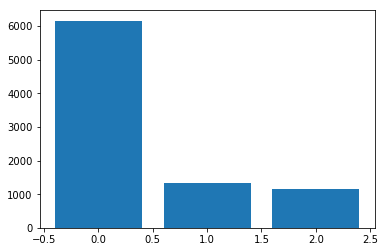

In [84]:
x = np.arange(3)
plt.bar(x, height= [len(a),len(b),len(c)]) 

## (MAPPER)

KEYS

1 = the flow is less than a minute

2 = the flow is long more than a minute but less than 2 minutes

3 = longer than 2 minutes

## (REDUCER)

sum all the values of the same key (bucket)

In [195]:
cat flow_stripped_extract.csv   | sort -r -k1,1| ./ex9mapper.py  | ./ex9reducer.py 

 44814   873   100.67.63.238   99.204.139.37	89879.262
  7000  7001  49.219.221.197 117.101.228.230	845268.222
 35509   443  119.142.113.66  131.172.156.78	71039.566
     0     0fd:ff00..ff:ff12c180:ff..76:c979	706379.732
   443 59091   82.186.210.16  115.157.228.92	57659.706
 59091   443  115.157.228.92   82.186.210.16	57659.119
 46350  1095    118.80.32.14  117.22.153.158	55854.232
    22 31305    51.57.37.243 110.177.249.176	52439.633
 47100    80   117.216.211.4  116.158.174.45	49317.559
 50246   443  51.237.250.179  243.217.224.21	42418.936
 52819 15749   57.249.126.89    51.57.63.222	36898.265
 53727 22003     51.1.24.155   90.228.175.91	36412.913
  7000  7001   120.105.31.23  117.101.229.86	3608277.515
    22 40551  118.161.154.63    95.253.2.103	33657.764
   443 60853  219.170.11.140  51.171.251.225	29339.769
 39252 33550   119.94.170.34   109.71.12.149	28793.813
   443  1326  219.170.11.186   51.171.251.37	27413.506
   443 50623  219.170.10.153   51.171.231.55	27059.855
   443

 10437   443  51.245.215.148    98.140.0.243	34.082
 33486  1094   51.142.79.217 117.113.207.167	33.981
 38469   389  69.149.166.100  104.83.177.228	33.725
  9464  9297df81:f9..00:d559207e:9b..ffff:79	33.706
 62329   443    93.175.98.28    203.206.37.9	33.683
  8818  87902081:c6..ff:3ddddf01:c6..ff:ffce	33.412
   443  1083  175.158.71.111  51.161.250.155	33.359
 27290  8777 119.142.222.147   95.44.208.134	33.278
 52364   443     66.44.22.54  117.181.102.35	33.107
 10300 52988    51.6.144.232    243.12.21.28	33.081
   443 60184 219.195.140.113  48.142.134.177	33.052
  8908  9048df7e:bf..00:ff832001:38..00:a:69	32.832
  9155  8839   108.90.159.62   95.253.230.53	32.563
  9244  9106    57.242.84.94   51.51.156.163	32.472
   443 49844  175.158.71.169    50.114.68.42	32.436
 10229    80    51.243.16.46    238.141.1.41	32.375
   443 51759    98.140.0.243  49.112.207.209	32.305
   443 60612  37.196.184.103  243.77.212.163	32.181
   443 10940   175.158.71.81    51.6.144.224	32.159
 44017   443

 53000   443  103.79.214.202 224.237.183.171	0.0
  6553   443   51.161.240.68 224.237.183.171	0.0
 57738   443   48.166.114.64 224.237.183.171	0.0
 63082   443   48.142.38.125 224.237.183.171	0.0
 24253   443   100.67.70.176 224.237.183.171	0.0
 53083   443   100.67.19.138 224.237.183.171	0.0
 36766   443    51.161.186.7 224.237.183.171	0.0
 49429   443 104.230.239.168 224.237.183.155	0.0
 53116   443 104.102.134.202 224.237.183.155	0.0
 58007   443  48.142.197.237 224.237.183.155	0.0
 45222   443   48.252.71.194 224.237.183.155	0.0
 34865   443   48.142.215.73 224.237.183.155	0.0
 62861   443   48.142.197.84 224.237.183.155	0.0
 37112   443   175.36.216.63 224.237.183.155	0.0
 52200   443   104.59.21.164 224.237.183.155	0.0
 54098   443    48.252.71.44 224.237.183.155	0.0
 29446   443     104.83.70.8 224.237.183.155	0.0
 52588   443   164.64.161.16 224.237.183.149	0.0
 10017   443    51.6.144.224 224.237.183.149	0.0
 59953   443    48.252.71.39 224.237.183.149	0.0
 58277   443  166.21

  7185 40716  99.223.238.203   161.167.204.1	0.0
  7527 40716  95.186.241.182   161.167.204.1	0.0
   727 52348 224.226.133.203   161.167.199.3	0.0
   864 52359 172.110.212.179   161.167.199.3	0.0
   150 52199 122.100.212.174   161.167.199.3	0.0
   948 52359 122.100.172.169   161.167.199.3	0.0
   862 52359 122.100.164.180   161.167.199.3	0.0
   854 52359 118.144.255.211   161.167.199.3	0.0
   880 52359 118.144.117.232   161.167.199.3	0.0
  1579 52398 110.227.157.125   161.167.199.3	0.0
   470 52336 110.180.124.229   161.167.199.3	0.0
   497 52336 110.177.220.167   161.167.199.3	0.0
   762 52348 110.177.201.233   161.167.199.3	0.0
  1552 52398 110.177.196.222   161.167.199.3	0.0
  1284 52387 110.177.111.100   161.167.199.3	0.0
  1838 52419 110.177.107.122   161.167.199.3	0.0
  1787 52409 104.140.121.189   161.167.199.3	0.0
   196 52199  99.223.201.195   161.167.199.3	0.0
  1957 52419  99.223.151.171   161.167.199.3	0.0
   648 52348  97.214.215.121   161.167.199.3	0.0
  1019 52374  97.214

 11012   443  51.171.181.180  232.136.63.105	0.0
 36513   443  51.171.179.227  232.136.63.105	0.0
 65322   443  51.171.177.119  232.136.63.105	0.0
 52706   443  51.171.175.176  232.136.63.105	0.0
 60598   443  51.171.167.111  232.136.63.105	0.0
 60544   443  51.171.167.111  232.136.63.105	0.0
  9657   443  51.171.163.161  232.136.63.105	0.0
  8064   443  51.171.163.161  232.136.63.105	0.0
 24304   443  51.171.162.167  232.136.63.105	0.0
 55195   443  51.171.162.148  232.136.63.105	0.0
  1231   443  51.171.161.152  232.136.63.105	0.0
 59829   443   51.171.231.68  232.136.63.105	0.0
 61058   443   51.171.190.27  232.136.63.105	0.0
 10500   443  51.245.215.148  232.136.63.104	0.0
 64540   443  51.171.254.144  232.136.63.104	0.0
 49384   443  51.171.254.133  232.136.63.104	0.0
 50402   443  51.171.251.115  232.136.63.104	0.0
 50301   443  51.171.251.115  232.136.63.104	0.0
  1539   443  51.171.251.115  232.136.63.104	0.0
 12076   443  51.171.248.225  232.136.63.104	0.0
  5763   443  51.171

   8.0     0   201.97.219.85  48.142.119.218	0.0
   8.0     0   189.151.9.169  48.142.119.218	0.0
   8.0     0   186.29.165.57  48.142.119.218	0.0
   8.0     0   176.84.95.179  48.142.119.218	0.0
   8.0     0   174.43.65.197  48.142.119.218	0.0
   8.0     0   145.175.53.95  48.142.119.218	0.0
   8.0     0   117.13.38.195  48.142.119.218	0.0
   8.0     0   101.231.0.155  48.142.119.218	0.0
   8.0     0    73.93.139.64  48.142.119.218	0.0
   8.0     0    73.107.9.127  48.142.119.218	0.0
   8.0     0    70.118.4.231  48.142.119.218	0.0
   8.0     0    38.81.77.253  48.142.119.218	0.0
   8.0     0    231.168.57.3  48.142.119.218	0.0
   8.0     0    166.82.72.18  48.142.119.218	0.0
   8.0     0    143.62.1.155  48.142.119.218	0.0
   8.0     0    102.120.3.54  48.142.119.218	0.0
   8.0     0     96.11.160.3  48.142.119.218	0.0
   8.0     0     87.41.15.54  48.142.119.218	0.0
   8.0     0     80.5.85.188  48.142.119.218	0.0
   8.0     0     58.42.117.9  48.142.119.218	0.0
   8.0     0     55.

In [100]:
cat flow_stripped_extract.csv | ./mapper_ratio.py | sort -k1,1 | ./reducer_ratio.py 

0	0-294600
10310	0-102796800
1103	0-690332100
11537	916800-2461607100
1162	0-169153800
12046	0-145340400
1213	0-67545600
12200	0-931200
12322	0-405300
12578	0-3582000
12654	0-22800
12687	0-937200
12876	0-113235900
12989	0-979200
1299	18000-181456500
13030	0-38400
13092	0-36067800
13193	0-504000
13238	0-567300
132467	0-12000
13285	0-102600
13335	0-12785100
13414	0-4994100
137	0-4196748300
14907	0-1546200
15133	0-164474100
15169	0-280214100
16265	0-8232300
16276	15600-93462900
16509	0-106729500
174	485400-786162900
17579	0-77528400
1853	0-129922200
1916	0-31317600
1930	23100-213329700
1955	0-33564900
19551	0-1426200
19679	0-155896800
197000	0-115800
197118	0-740100
198792	0-29946000
199354	0-885600
199524	0-26952000
200052	0-12000
202425	42600-3990300
20473	0-660000
20773	450000-7058400
2091	0-4356762300
20940	0-333741000
20965	0-261357000
2107	0-155261700
2108	0-12835500
2119	0-14400
21274	0-4727400
2200	56100-298527900
22822	0-8262000
23911	0-751174800
24167	0-43224600
24490	0-953100
2

In [86]:
def dis(*args):
    s = []; s1 = []; s2 = []
    for d in args:
        if d < 1:
            s.append(d)
        elif (d < 2) & (d > 1):
            s1.append(d)
        else:
            s2.append(d)
    return s,s1,s2

In [87]:
s = dis(2,4,1,5,0,1.5)

In [90]:
s[2]

[2, 4, 1, 5]